## SoftMax Regression

Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes. In logistic regression we assumed that the labels were binary: y(i)∈{0,1}. We used such a classifier to distinguish between two kinds of hand-written digits. Softmax regression allows us to handle y(i)∈{1,…,K} where K is the number of classes.

Recall that in logistic regression, we had a training set {(x(1),y(1)),…,(x(m),y(m))} of m labeled examples, where the input features are x(i)∈Rn. With logistic regression, we were in the binary classification setting, so the labels were y(i)∈{0,1}. Our hypothesis took the form:

$$
\begin{array}{c}{h_{\theta}(x)=\frac{1}{1+e^{-\theta T_{x}}}} \end{array}
$$

and the model parameters θ were trained to minimize the cost function

$$
J(\theta)=-\frac{1}{m} \sum_{i=1}^{m}\left[y^{i} \log \left(h_{\theta}\left(x^{i}\right)\right)+\left(1-y^{i}\right) \log \left(1-h_{\theta}\left(x^{i}\right)\right)\right]
$$

In the softmax regression setting, we are interested in multi-class classification (as opposed to only binary classification), and so the label y can take on K different values, rather than only two. Thus, in our training set {(x(1),y(1)),…,(x(m),y(m))}, we now have that y(i)∈{1,2,…,K}. (Note that our convention will be to index the classes starting from 1, rather than from 0.) For example, in the MNIST digit recognition task, we would have K=10 different classes.

Given a test input x, we want our hypothesis to estimate the probability that P(y=k|x) for each value of k=1,…,K. I.e., we want to estimate the probability of the class label taking on each of the K different possible values. Thus, our hypothesis will output a K-dimensional vector (whose elements sum to 1) giving us our K estimated probabilities. Concretely, our hypothesis hθ(x) takes the form:


$$h_{\theta}(x)=\left[ \begin{array}{c}{P(y=1 | x ; \theta)} \\ {P(y=2 | x ; \theta)} \\ {\vdots} \\ {P(y=K | x ; \theta)}\end{array}\right]=\frac{1}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x\right)} \left[ \begin{array}{c}{\exp \left(\theta^{(1) \top} x\right)} \\ {\exp \left(\theta^{(2) \top} x\right)} \\ {\vdots} \\ {\exp \left(\theta^{(K) \top} x\right)}\end{array}\right]$$

Here $\theta^{(1)}, \theta^{(2)}, \ldots, \theta^{(K)} \in \mathfrak{R}^{n}$ are the parameters of our model. Notice that the term $\frac{1}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x\right)}$ normalizes the distribution, so that it sums to one.

# Cost Function

We now describe the cost function that we’ll use for softmax regression.

Our cost function will be
$$J(\theta)=-\left[\sum_{i=1}^{m} \sum_{k=1}^{K} 1\left\{y^{(i)}=k\right\} \log \frac{\exp \left(\theta^{(k) \top} x^{(i)}\right)}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x^{(i)}\right)}\right]$$

Notice that this generalizes the logistic regression cost function, which could also have been written:

$$\begin{aligned} J(\theta) &=-\left[\sum_{i=1}^{m}\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(x^{(i)}\right)\right)+y^{(i)} \log h_{\theta}\left(x^{(i)}\right)\right] \\ &=-\left[\sum_{i=1}^{m} \sum_{k=0}^{1} 1\left\{y^{(i)}=k\right\} \log P\left(y^{(i)}=k | x^{(i)} ; \theta\right)\right] \end{aligned}$$

The softmax cost function is similar, except that we now sum over the K different possible values of the class label. Note also that in softmax regression, we have that

$$P\left(y^{(i)}=k | x^{(i)} ; \theta\right)=\frac{\exp \left(\theta^{(k) \top} x^{(i)}\right)}{\sum_{j=1}^{K} \exp \left(\theta^{(j) \top} x^{(i)}\right)}$$


We cannot solve for the minimum of J(θ) analytically, and thus as usual we’ll resort to an iterative optimization algorithm. Taking derivatives, one can show that the gradient is:

$$\nabla_{\theta^{(k)}} J(\theta)=-\sum_{i=1}^{m}\left[x^{(i)}\left(1\left\{y^{(i)}=k\right\}-P\left(y^{(i)}=k | x^{(i)} ; \theta\right)\right)\right]$$

Recall the meaning of the ”$\nabla_{\theta^{(k)}}$” notation. In particular, $\nabla_{\theta^{(k)}} J(\theta)$ is itself a vector, so that its j-th element is $\frac{\partial J(\theta)}{\partial \theta_{l k}}$ the partial derivative of $J(\theta)$ with respect to the j-th element of $\theta(k)$.

Armed with this formula for the derivative, one can then plug it into a standard optimization package and have it minimize $J(\theta)$.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('glass.csv')
N_labels = len(set(raw_data['Type']))
raw_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


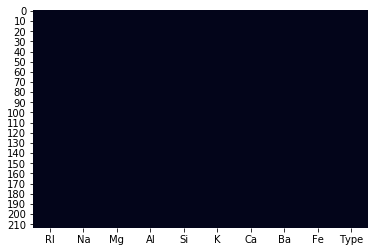

In [3]:
#Check null entries
sns.heatmap(raw_data.isnull(),cbar=False)
# no entry is null

# Data visualization

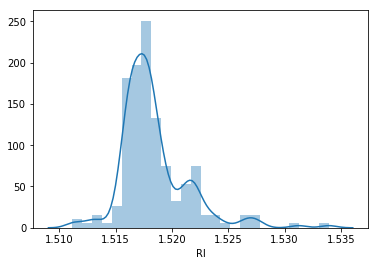

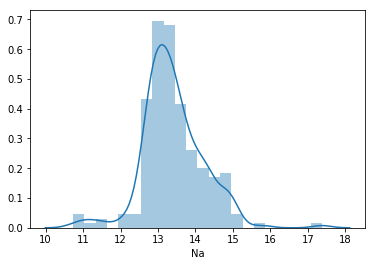

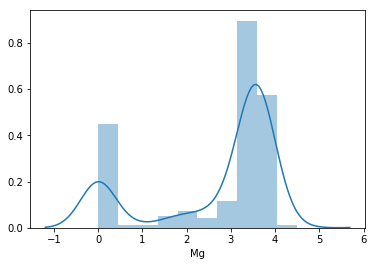

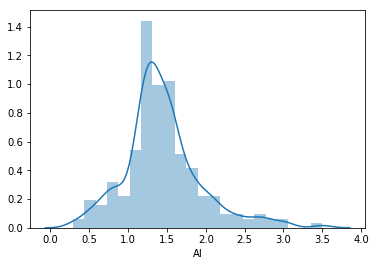

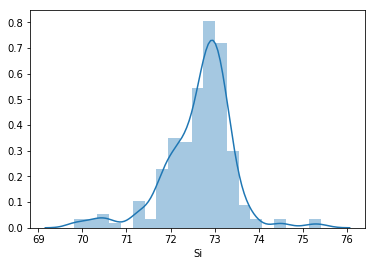

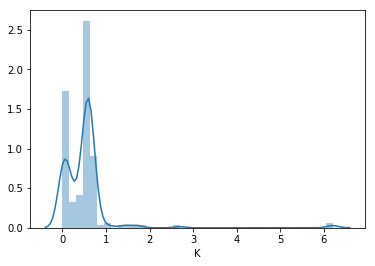

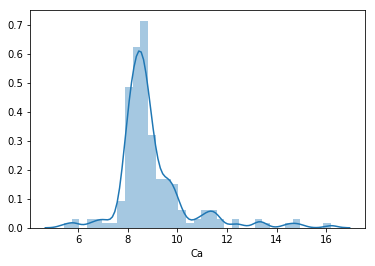

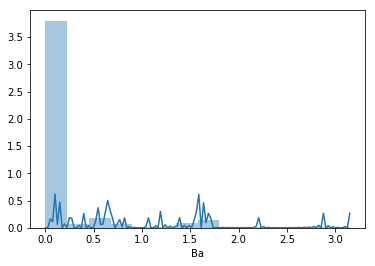

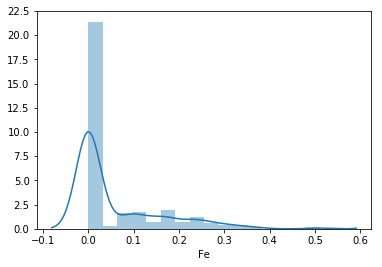

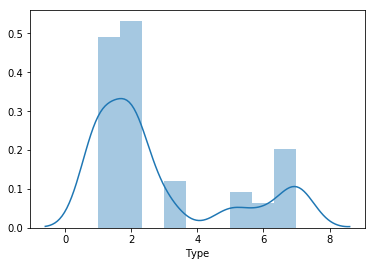

In [4]:
for feat in raw_data:
    sns.distplot(raw_data[feat])
    plt.show()

## These graphs clearly shows that our data in not Normally distributed it means due to some features our classification algorithm may be disturb

## Lets find the correlation between all features

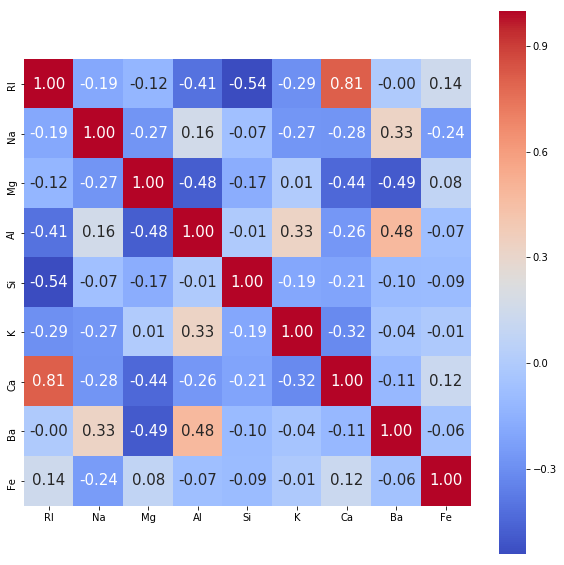

In [5]:
features = raw_data.columns[:-1].tolist()
corr = raw_data[features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, cmap= 'coolwarm')
plt.show()

## Ca and RI are positivity correlated i.e both are dependent Ba and Al also
## Therefore 
## 1. Logistic regression may not give us perfect results because according to there assumptions all independent variables are independent to each other.
## 2. Maximum liklihood not give us good results in small data sets

## But we try to compute classification on this data without any further changes

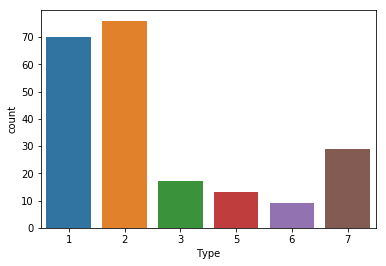

In [6]:
sns.countplot(raw_data['Type'])
plt.show()

## We have 6 labels = [1,2,3,5,6,7] out of which 1 and 2 label contains more than 70 % of data

# Data Wrangling


In [7]:
# data seperation
z = list(map(lambda i:raw_data[raw_data['Type']==i].iloc[:int(0.7*raw_data[raw_data['Type']==i].shape[0]),:],
             set(raw_data['Type'])))
training_data = pd.DataFrame()
training_data = training_data.append(z)
training_data_labels = np.array(training_data['Type'])
training_data.drop('Type',inplace=True,axis=1)
training_data = np.array(training_data)
training_data = (training_data)/np.max(training_data)  # normalized data

x = list(map(lambda i:raw_data[raw_data['Type']==i].iloc[:int(0.3*raw_data[raw_data['Type']==i].shape[0]),:],set(raw_data['Type'])))
testing_data = pd.DataFrame()
testing_data = testing_data.append(x)
testing_data_labels = np.array(testing_data['Type'])
testing_data.drop('Type',inplace=True,axis=1)
testing_data = np.array(testing_data)
testing_data = (testing_data)/np.max(testing_data)  # normalized data

pd.DataFrame(training_data)

,0,1,2,3,4,5,6,7,8
0,0.020232,0.181431,0.059723,0.014632,0.954775,0.000798,0.116387,0.000000,0.000000
1,0.020186,0.184757,0.047885,0.018090,0.967412,0.006385,0.104150,0.000000,0.000000
2,0.020167,0.179968,0.047220,0.020484,0.970870,0.005188,0.103485,0.000000,0.000000
3,0.020187,0.175712,0.049082,0.017159,0.965815,0.007582,0.109338,0.000000,0.000000
4,0.020184,0.176510,0.048151,0.016494,0.972067,0.007316,0.107342,0.000000,0.000000
5,0.020164,0.170125,0.048018,0.021548,0.970604,0.008513,0.107342,0.000000,0.003458
6,0.020184,0.176909,0.047885,0.015164,0.972200,0.007715,0.108673,0.000000,0.000000
7,0.020186,0.174914,0.048018,0.013966,0.974195,0.007582,0.109604,0.000000,0.000000
8,0.020207,0.186752,0.047619,0.018223,0.958766,0.007449,0.110402,0.000000,0.000000
9,0.020186,0.172918,0.047885,0.018090,0.970870,0.007582,0.111732,0.000000,0.001463


In [8]:
pd.DataFrame(testing_data)

,0,1,2,3,4,5,6,7,8
0,0.020705,0.185679,0.061122,0.014974,0.977130,0.000817,0.119112,0.000000,0.000000
1,0.020659,0.189082,0.049006,0.018513,0.990063,0.006534,0.106589,0.000000,0.000000
2,0.020640,0.184182,0.048326,0.020964,0.993602,0.005309,0.105908,0.000000,0.000000
3,0.020660,0.179826,0.050231,0.017561,0.988429,0.007759,0.111898,0.000000,0.000000
4,0.020656,0.180643,0.049279,0.016880,0.994827,0.007487,0.109856,0.000000,0.000000
5,0.020637,0.174108,0.049142,0.022053,0.993330,0.008712,0.109856,0.000000,0.003539
6,0.020657,0.181051,0.049006,0.015519,0.994963,0.007895,0.111217,0.000000,0.000000
7,0.020658,0.179009,0.049142,0.014293,0.997005,0.007759,0.112170,0.000000,0.000000
8,0.020680,0.191124,0.048734,0.018650,0.981214,0.007623,0.112987,0.000000,0.000000
9,0.020658,0.176967,0.049006,0.018513,0.993602,0.007759,0.114348,0.000000,0.001497


## One Hot Encoding
A one hot encoding is a representation of categorical variables as binary vectors.

This first requires that the categorical values be mapped to integer values.

Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [9]:
def oneHotEncoding(label):
    s = pd.Series(label)
    return np.array(pd.get_dummies(s))
training_label_hot_encoded = oneHotEncoding(training_data_labels)
testing_label_hot_encoded = oneHotEncoding(testing_data_labels)
training_label_hot_encoded

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
 

In [25]:
def softmax(theta0 , theta , data):
    exp = np.exp(theta0 + np.dot(data , theta))
    sum_denominator = np.sum((exp),axis=1)
    s = list(map(lambda i : exp[:,i] / sum_denominator , np.arange(N_labels)))
    return np.array(s).T

alpha = 0.001
epsilon = 0.00001
initial_theta0 = np.random.randn(1,N_labels) 
initial_theta = np.random.randn(training_data.shape[1] , N_labels)
i = 0
fc = []
itera = []
while(True):
    i+=1
 
    del_theta0 = (np.sum((softmax(initial_theta0 , initial_theta , training_data) - training_label_hot_encoded),axis = 0))/training_data.shape[0]
    del_theta = (np.matmul(training_data.T,(softmax(initial_theta0,initial_theta,training_data)-training_label_hot_encoded)))/training_data.shape[0]

    final_theta0 = initial_theta0 - alpha * del_theta0
    final_theta = initial_theta - alpha * del_theta

    initial_cost = (-np.sum(
        np.matmul(np.log(softmax(initial_theta0 , initial_theta , training_data)).T , training_label_hot_encoded )
        ))/training_data.shape[0]

    final_cost = (-np.sum(
        np.matmul(np.log(softmax(final_theta0 , final_theta , training_data)).T , training_label_hot_encoded )
        ))/training_data.shape[0]
    
    if (abs(final_cost - initial_cost)) < epsilon:
        break
    print('at {} iteration ANL : {}'.format(i,initial_cost))
    initial_theta0 = final_theta0
    initial_theta  = final_theta
    itera.append(i)
    fc.append(final_cost)

at 1 iteration ANL : 18.835770875936575
at 2 iteration ANL : 18.831747299251294
at 3 iteration ANL : 18.827726924780013
at 4 iteration ANL : 18.82370975193834
at 5 iteration ANL : 18.819695780136716
at 6 iteration ANL : 18.815685008780466
at 7 iteration ANL : 18.811677437269793
at 8 iteration ANL : 18.80767306499977
at 9 iteration ANL : 18.80367189136033
at 10 iteration ANL : 18.799673915736314
at 11 iteration ANL : 18.79567913750746
at 12 iteration ANL : 18.791687556048362
at 13 iteration ANL : 18.787699170728544
at 14 iteration ANL : 18.783713980912424
at 15 iteration ANL : 18.779731985959323
at 16 iteration ANL : 18.775753185223472
at 17 iteration ANL : 18.771777578054024
at 18 iteration ANL : 18.76780516379506
at 19 iteration ANL : 18.763835941785565
at 20 iteration ANL : 18.759869911359473
at 21 iteration ANL : 18.755907071845638
at 22 iteration ANL : 18.75194742256787
at 23 iteration ANL : 18.747990962844924
at 24 iteration ANL : 18.74403769199048
at 25 iteration ANL : 18.7400876

at 289 iteration ANL : 17.805668453203324
at 290 iteration ANL : 17.80252440044114
at 291 iteration ANL : 17.799383194298514
at 292 iteration ANL : 17.796244832997594
at 293 iteration ANL : 17.793109314757658
at 294 iteration ANL : 17.789976637795156
at 295 iteration ANL : 17.78684680032369
at 296 iteration ANL : 17.78371980055404
at 297 iteration ANL : 17.780595636694155
at 298 iteration ANL : 17.777474306949188
at 299 iteration ANL : 17.774355809521495
at 300 iteration ANL : 17.771240142610655
at 301 iteration ANL : 17.768127304413436
at 302 iteration ANL : 17.765017293123883
at 303 iteration ANL : 17.76191010693325
at 304 iteration ANL : 17.75880574403006
at 305 iteration ANL : 17.75570420260011
at 306 iteration ANL : 17.752605480826453
at 307 iteration ANL : 17.74950957688942
at 308 iteration ANL : 17.746416488966663
at 309 iteration ANL : 17.743326215233125
at 310 iteration ANL : 17.74023875386106
at 311 iteration ANL : 17.737154103020057
at 312 iteration ANL : 17.73407226087703
a

at 556 iteration ANL : 17.06123488252193
at 557 iteration ANL : 17.058780877612087
at 558 iteration ANL : 17.056329174775737
at 559 iteration ANL : 17.0538797718257
at 560 iteration ANL : 17.051432666574478
at 561 iteration ANL : 17.048987856834334
at 562 iteration ANL : 17.046545340417225
at 563 iteration ANL : 17.044105115134847
at 564 iteration ANL : 17.041667178798665
at 565 iteration ANL : 17.03923152921987
at 566 iteration ANL : 17.036798164209426
at 567 iteration ANL : 17.03436708157807
at 568 iteration ANL : 17.0319382791363
at 569 iteration ANL : 17.029511754694422
at 570 iteration ANL : 17.027087506062514
at 571 iteration ANL : 17.02466553105047
at 572 iteration ANL : 17.02224582746798
at 573 iteration ANL : 17.019828393124577
at 574 iteration ANL : 17.017413225829575
at 575 iteration ANL : 17.01500032339216
at 576 iteration ANL : 17.012589683621346
at 577 iteration ANL : 17.010181304326
at 578 iteration ANL : 17.007775183314834
at 579 iteration ANL : 17.00537131839644
at 580

at 792 iteration ANL : 16.54120336336112
at 793 iteration ANL : 16.539232309400145
at 794 iteration ANL : 16.537263048963762
at 795 iteration ANL : 16.53529557998744
at 796 iteration ANL : 16.533329900407818
at 797 iteration ANL : 16.531366008162706
at 798 iteration ANL : 16.529403901191127
at 799 iteration ANL : 16.52744357743324
at 800 iteration ANL : 16.525485034830425
at 801 iteration ANL : 16.523528271325233
at 802 iteration ANL : 16.52157328486141
at 803 iteration ANL : 16.519620073383933
at 804 iteration ANL : 16.51766863483894
at 805 iteration ANL : 16.51571896717379
at 806 iteration ANL : 16.513771068337075
at 807 iteration ANL : 16.51182493627856
at 808 iteration ANL : 16.50988056894927
at 809 iteration ANL : 16.507937964301426
at 810 iteration ANL : 16.505997120288484
at 811 iteration ANL : 16.504058034865132
at 812 iteration ANL : 16.50212070598729
at 813 iteration ANL : 16.500185131612117
at 814 iteration ANL : 16.49825130969802
at 815 iteration ANL : 16.496319238204634
at

at 1045 iteration ANL : 16.094417957463435
at 1046 iteration ANL : 16.092838524770688
at 1047 iteration ANL : 16.091260408890967
at 1048 iteration ANL : 16.08968360814526
at 1049 iteration ANL : 16.088108120856276
at 1050 iteration ANL : 16.086533945348457
at 1051 iteration ANL : 16.084961079947984
at 1052 iteration ANL : 16.083389522982767
at 1053 iteration ANL : 16.081819272782457
at 1054 iteration ANL : 16.080250327678424
at 1055 iteration ANL : 16.0786826860038
at 1056 iteration ANL : 16.077116346093412
at 1057 iteration ANL : 16.07555130628386
at 1058 iteration ANL : 16.073987564913466
at 1059 iteration ANL : 16.072425120322293
at 1060 iteration ANL : 16.07086397085213
at 1061 iteration ANL : 16.06930411484652
at 1062 iteration ANL : 16.067745550650738
at 1063 iteration ANL : 16.066188276611786
at 1064 iteration ANL : 16.064632291078432
at 1065 iteration ANL : 16.063077592401157
at 1066 iteration ANL : 16.06152417893221
at 1067 iteration ANL : 16.059972049025557
at 1068 iteration 

at 1308 iteration ANL : 15.719702234229185
at 1309 iteration ANL : 15.718416496381565
at 1310 iteration ANL : 15.717131693583582
at 1311 iteration ANL : 15.715847824608044
at 1312 iteration ANL : 15.714564888229384
at 1313 iteration ANL : 15.713282883223668
at 1314 iteration ANL : 15.712001808368578
at 1315 iteration ANL : 15.710721662443433
at 1316 iteration ANL : 15.70944244422918
at 1317 iteration ANL : 15.708164152508381
at 1318 iteration ANL : 15.706886786065217
at 1319 iteration ANL : 15.705610343685505
at 1320 iteration ANL : 15.704334824156666
at 1321 iteration ANL : 15.703060226267747
at 1322 iteration ANL : 15.701786548809423
at 1323 iteration ANL : 15.700513790573966
at 1324 iteration ANL : 15.699241950355276
at 1325 iteration ANL : 15.697971026948869
at 1326 iteration ANL : 15.696701019151865
at 1327 iteration ANL : 15.695431925763009
at 1328 iteration ANL : 15.694163745582642
at 1329 iteration ANL : 15.692896477412724
at 1330 iteration ANL : 15.691630120056832
at 1331 iter

at 1567 iteration ANL : 15.414711581894352
at 1568 iteration ANL : 15.413631455316686
at 1569 iteration ANL : 15.412551996742392
at 1570 iteration ANL : 15.411473205322517
at 1571 iteration ANL : 15.410395080209355
at 1572 iteration ANL : 15.4093176205565
at 1573 iteration ANL : 15.4082408255188
at 1574 iteration ANL : 15.407164694252376
at 1575 iteration ANL : 15.40608922591462
at 1576 iteration ANL : 15.405014419664191
at 1577 iteration ANL : 15.403940274661009
at 1578 iteration ANL : 15.402866790066259
at 1579 iteration ANL : 15.401793965042387
at 1580 iteration ANL : 15.400721798753116
at 1581 iteration ANL : 15.39965029036339
at 1582 iteration ANL : 15.398579439039445
at 1583 iteration ANL : 15.397509243948766
at 1584 iteration ANL : 15.396439704260086
at 1585 iteration ANL : 15.395370819143391
at 1586 iteration ANL : 15.394302587769925
at 1587 iteration ANL : 15.393235009312177
at 1588 iteration ANL : 15.392168082943886
at 1589 iteration ANL : 15.391101807840048
at 1590 iteration

at 1826 iteration ANL : 15.155067094553171
at 1827 iteration ANL : 15.15413499223255
at 1828 iteration ANL : 15.15320337639509
at 1829 iteration ANL : 15.15227224647317
at 1830 iteration ANL : 15.151341601900072
at 1831 iteration ANL : 15.150411442109968
at 1832 iteration ANL : 15.149481766537958
at 1833 iteration ANL : 15.148552574620014
at 1834 iteration ANL : 15.147623865793031
at 1835 iteration ANL : 15.1466956394948
at 1836 iteration ANL : 15.145767895163987
at 1837 iteration ANL : 15.144840632240188
at 1838 iteration ANL : 15.143913850163875
at 1839 iteration ANL : 15.142987548376402
at 1840 iteration ANL : 15.142061726320039
at 1841 iteration ANL : 15.141136383437942
at 1842 iteration ANL : 15.140211519174143
at 1843 iteration ANL : 15.139287132973575
at 1844 iteration ANL : 15.138363224282044
at 1845 iteration ANL : 15.137439792546271
at 1846 iteration ANL : 15.136516837213826
at 1847 iteration ANL : 15.135594357733186
at 1848 iteration ANL : 15.1346723535537
at 1849 iteration 

at 2087 iteration ANL : 14.926790880558437
at 2088 iteration ANL : 14.925968907670322
at 2089 iteration ANL : 14.925147300237203
at 2090 iteration ANL : 14.924326057887043
at 2091 iteration ANL : 14.923505180248428
at 2092 iteration ANL : 14.922684666950529
at 2093 iteration ANL : 14.921864517623131
at 2094 iteration ANL : 14.921044731896632
at 2095 iteration ANL : 14.920225309402024
at 2096 iteration ANL : 14.919406249770907
at 2097 iteration ANL : 14.918587552635467
at 2098 iteration ANL : 14.917769217628512
at 2099 iteration ANL : 14.916951244383432
at 2100 iteration ANL : 14.916133632534223
at 2101 iteration ANL : 14.915316381715474
at 2102 iteration ANL : 14.914499491562381
at 2103 iteration ANL : 14.913682961710725
at 2104 iteration ANL : 14.912866791796878
at 2105 iteration ANL : 14.912050981457815
at 2106 iteration ANL : 14.911235530331101
at 2107 iteration ANL : 14.910420438054892
at 2108 iteration ANL : 14.90960570426793
at 2109 iteration ANL : 14.908791328609556
at 2110 iter

at 2347 iteration ANL : 14.724409684822447
at 2348 iteration ANL : 14.723671792065893
at 2349 iteration ANL : 14.722934185881615
at 2350 iteration ANL : 14.72219686602613
at 2351 iteration ANL : 14.721459832256352
at 2352 iteration ANL : 14.720723084329602
at 2353 iteration ANL : 14.719986622003578
at 2354 iteration ANL : 14.719250445036366
at 2355 iteration ANL : 14.718514553186473
at 2356 iteration ANL : 14.717778946212771
at 2357 iteration ANL : 14.71704362387452
at 2358 iteration ANL : 14.716308585931387
at 2359 iteration ANL : 14.715573832143424
at 2360 iteration ANL : 14.714839362271055
at 2361 iteration ANL : 14.714105176075105
at 2362 iteration ANL : 14.71337127331679
at 2363 iteration ANL : 14.712637653757707
at 2364 iteration ANL : 14.71190431715983
at 2365 iteration ANL : 14.711171263285527
at 2366 iteration ANL : 14.710438491897552
at 2367 iteration ANL : 14.70970600275904
at 2368 iteration ANL : 14.708973795633504
at 2369 iteration ANL : 14.708241870284855
at 2370 iteratio

at 2607 iteration ANL : 14.541568781979612
at 2608 iteration ANL : 14.54089822598129
at 2609 iteration ANL : 14.540227904759098
at 2610 iteration ANL : 14.53955781815217
at 2611 iteration ANL : 14.53888796599993
at 2612 iteration ANL : 14.538218348142019
at 2613 iteration ANL : 14.537548964418344
at 2614 iteration ANL : 14.536879814669062
at 2615 iteration ANL : 14.536210898734572
at 2616 iteration ANL : 14.535542216455534
at 2617 iteration ANL : 14.534873767672837
at 2618 iteration ANL : 14.534205552227625
at 2619 iteration ANL : 14.533537569961306
at 2620 iteration ANL : 14.532869820715513
at 2621 iteration ANL : 14.532202304332127
at 2622 iteration ANL : 14.531535020653287
at 2623 iteration ANL : 14.53086796952138
at 2624 iteration ANL : 14.530201150779012
at 2625 iteration ANL : 14.529534564269062
at 2626 iteration ANL : 14.528868209834636
at 2627 iteration ANL : 14.528202087319103
at 2628 iteration ANL : 14.527536196566047
at 2629 iteration ANL : 14.526870537419313
at 2630 iterati

at 2868 iteration ANL : 14.374091803667175
at 2869 iteration ANL : 14.373477723998874
at 2870 iteration ANL : 14.372863844461452
at 2871 iteration ANL : 14.37225016494641
at 2872 iteration ANL : 14.371636685345388
at 2873 iteration ANL : 14.371023405550192
at 2874 iteration ANL : 14.370410325452793
at 2875 iteration ANL : 14.369797444945306
at 2876 iteration ANL : 14.369184763920003
at 2877 iteration ANL : 14.368572282269309
at 2878 iteration ANL : 14.367959999885821
at 2879 iteration ANL : 14.367347916662268
at 2880 iteration ANL : 14.366736032491549
at 2881 iteration ANL : 14.366124347266709
at 2882 iteration ANL : 14.365512860880957
at 2883 iteration ANL : 14.364901573227645
at 2884 iteration ANL : 14.36429048420028
at 2885 iteration ANL : 14.363679593692533
at 2886 iteration ANL : 14.363068901598211
at 2887 iteration ANL : 14.362458407811287
at 2888 iteration ANL : 14.361848112225886
at 2889 iteration ANL : 14.361238014736276
at 2890 iteration ANL : 14.36062811523688
at 2891 iterat

at 3104 iteration ANL : 14.234502139588963
at 3105 iteration ANL : 14.233932587996716
at 3106 iteration ANL : 14.23336321471875
at 3107 iteration ANL : 14.232794019676636
at 3108 iteration ANL : 14.232225002792058
at 3109 iteration ANL : 14.231656163986809
at 3110 iteration ANL : 14.231087503182767
at 3111 iteration ANL : 14.230519020301918
at 3112 iteration ANL : 14.22995071526635
at 3113 iteration ANL : 14.229382587998261
at 3114 iteration ANL : 14.228814638419925
at 3115 iteration ANL : 14.228246866453741
at 3116 iteration ANL : 14.227679272022202
at 3117 iteration ANL : 14.227111855047884
at 3118 iteration ANL : 14.226544615453491
at 3119 iteration ANL : 14.225977553161805
at 3120 iteration ANL : 14.225410668095714
at 3121 iteration ANL : 14.224843960178207
at 3122 iteration ANL : 14.224277429332368
at 3123 iteration ANL : 14.223711075481388
at 3124 iteration ANL : 14.223144898548547
at 3125 iteration ANL : 14.222578898457229
at 3126 iteration ANL : 14.222013075130917
at 3127 itera

at 3343 iteration ANL : 14.103286932986336
at 3344 iteration ANL : 14.102757973633587
at 3345 iteration ANL : 14.102229176362643
at 3346 iteration ANL : 14.101700541114711
at 3347 iteration ANL : 14.101172067831062
at 3348 iteration ANL : 14.100643756453035
at 3349 iteration ANL : 14.100115606922037
at 3350 iteration ANL : 14.099587619179527
at 3351 iteration ANL : 14.099059793167038
at 3352 iteration ANL : 14.098532128826163
at 3353 iteration ANL : 14.098004626098566
at 3354 iteration ANL : 14.09747728492597
at 3355 iteration ANL : 14.096950105250164
at 3356 iteration ANL : 14.096423087012994
at 3357 iteration ANL : 14.09589623015638
at 3358 iteration ANL : 14.095369534622302
at 3359 iteration ANL : 14.094843000352803
at 3360 iteration ANL : 14.094316627289988
at 3361 iteration ANL : 14.093790415376024
at 3362 iteration ANL : 14.093264364553146
at 3363 iteration ANL : 14.092738474763657
at 3364 iteration ANL : 14.092212745949904
at 3365 iteration ANL : 14.091687178054316
at 3366 itera

at 3582 iteration ANL : 13.981351225525398
at 3583 iteration ANL : 13.980859462748084
at 3584 iteration ANL : 13.980367849602384
at 3585 iteration ANL : 13.979876386042015
at 3586 iteration ANL : 13.979385072020738
at 3587 iteration ANL : 13.978893907492346
at 3588 iteration ANL : 13.978402892410683
at 3589 iteration ANL : 13.97791202672963
at 3590 iteration ANL : 13.977421310403104
at 3591 iteration ANL : 13.976930743385074
at 3592 iteration ANL : 13.976440325629545
at 3593 iteration ANL : 13.975950057090555
at 3594 iteration ANL : 13.975459937722192
at 3595 iteration ANL : 13.974969967478584
at 3596 iteration ANL : 13.974480146313896
at 3597 iteration ANL : 13.973990474182335
at 3598 iteration ANL : 13.97350095103815
at 3599 iteration ANL : 13.973011576835617
at 3600 iteration ANL : 13.972522351529081
at 3601 iteration ANL : 13.972033275072901
at 3602 iteration ANL : 13.971544347421485
at 3603 iteration ANL : 13.97105556852928
at 3604 iteration ANL : 13.970566938350776
at 3605 iterat

at 3828 iteration ANL : 13.864778911371937
at 3829 iteration ANL : 13.864322653675496
at 3830 iteration ANL : 13.863866535296182
at 3831 iteration ANL : 13.863410556195817
at 3832 iteration ANL : 13.862954716336255
at 3833 iteration ANL : 13.862499015679367
at 3834 iteration ANL : 13.862043454187052
at 3835 iteration ANL : 13.861588031821237
at 3836 iteration ANL : 13.861132748543874
at 3837 iteration ANL : 13.860677604316944
at 3838 iteration ANL : 13.860222599102439
at 3839 iteration ANL : 13.859767732862393
at 3840 iteration ANL : 13.859313005558866
at 3841 iteration ANL : 13.858858417153922
at 3842 iteration ANL : 13.858403967609673
at 3843 iteration ANL : 13.85794965688825
at 3844 iteration ANL : 13.857495484951805
at 3845 iteration ANL : 13.857041451762512
at 3846 iteration ANL : 13.856587557282582
at 3847 iteration ANL : 13.856133801474243
at 3848 iteration ANL : 13.855680184299748
at 3849 iteration ANL : 13.855226705721373
at 3850 iteration ANL : 13.85477336570143
at 3851 itera

at 4087 iteration ANL : 13.751157912376248
at 4088 iteration ANL : 13.750736527751233
at 4089 iteration ANL : 13.750315273290168
at 4090 iteration ANL : 13.749894148960129
at 4091 iteration ANL : 13.749473154728223
at 4092 iteration ANL : 13.74905229056155
at 4093 iteration ANL : 13.748631556427252
at 4094 iteration ANL : 13.748210952292473
at 4095 iteration ANL : 13.747790478124367
at 4096 iteration ANL : 13.74737013389011
at 4097 iteration ANL : 13.7469499195569
at 4098 iteration ANL : 13.746529835091943
at 4099 iteration ANL : 13.746109880462454
at 4100 iteration ANL : 13.745690055635679
at 4101 iteration ANL : 13.745270360578864
at 4102 iteration ANL : 13.744850795259286
at 4103 iteration ANL : 13.744431359644222
at 4104 iteration ANL : 13.744012053700974
at 4105 iteration ANL : 13.743592877396855
at 4106 iteration ANL : 13.743173830699197
at 4107 iteration ANL : 13.74275491357534
at 4108 iteration ANL : 13.742336125992647
at 4109 iteration ANL : 13.741917467918496
at 4110 iteratio

at 4353 iteration ANL : 13.643558038316831
at 4354 iteration ANL : 13.643170160248243
at 4355 iteration ANL : 13.642782404058659
at 4356 iteration ANL : 13.642394769718436
at 4357 iteration ANL : 13.642007257197958
at 4358 iteration ANL : 13.641619866467607
at 4359 iteration ANL : 13.641232597497783
at 4360 iteration ANL : 13.640845450258889
at 4361 iteration ANL : 13.640458424721338
at 4362 iteration ANL : 13.640071520855559
at 4363 iteration ANL : 13.639684738631974
at 4364 iteration ANL : 13.63929807802104
at 4365 iteration ANL : 13.638911538993206
at 4366 iteration ANL : 13.638525121518931
at 4367 iteration ANL : 13.638138825568687
at 4368 iteration ANL : 13.637752651112953
at 4369 iteration ANL : 13.637366598122224
at 4370 iteration ANL : 13.636980666566995
at 4371 iteration ANL : 13.636594856417776
at 4372 iteration ANL : 13.636209167645085
at 4373 iteration ANL : 13.635823600219448
at 4374 iteration ANL : 13.635438154111409
at 4375 iteration ANL : 13.635052829291505
at 4376 iter

at 4609 iteration ANL : 13.548159025041526
at 4610 iteration ANL : 13.547801404504957
at 4611 iteration ANL : 13.547443898531943
at 4612 iteration ANL : 13.547086507094825
at 4613 iteration ANL : 13.546729230165958
at 4614 iteration ANL : 13.546372067717698
at 4615 iteration ANL : 13.546015019722415
at 4616 iteration ANL : 13.545658086152477
at 4617 iteration ANL : 13.545301266980259
at 4618 iteration ANL : 13.544944562178149
at 4619 iteration ANL : 13.54458797171853
at 4620 iteration ANL : 13.544231495573802
at 4621 iteration ANL : 13.543875133716366
at 4622 iteration ANL : 13.54351888611863
at 4623 iteration ANL : 13.543162752753005
at 4624 iteration ANL : 13.542806733591915
at 4625 iteration ANL : 13.542450828607782
at 4626 iteration ANL : 13.542095037773043
at 4627 iteration ANL : 13.541739361060133
at 4628 iteration ANL : 13.541383798441496
at 4629 iteration ANL : 13.541028349889581
at 4630 iteration ANL : 13.540673015376854
at 4631 iteration ANL : 13.540317794875763
at 4632 itera

at 4866 iteration ANL : 13.459942928808319
at 4867 iteration ANL : 13.45961385724033
at 4868 iteration ANL : 13.459284893309828
at 4869 iteration ANL : 13.458956036990498
at 4870 iteration ANL : 13.458627288256032
at 4871 iteration ANL : 13.458298647080104
at 4872 iteration ANL : 13.457970113436428
at 4873 iteration ANL : 13.457641687298697
at 4874 iteration ANL : 13.457313368640609
at 4875 iteration ANL : 13.456985157435877
at 4876 iteration ANL : 13.45665705365821
at 4877 iteration ANL : 13.456329057281328
at 4878 iteration ANL : 13.45600116827895
at 4879 iteration ANL : 13.455673386624804
at 4880 iteration ANL : 13.455345712292617
at 4881 iteration ANL : 13.455018145256126
at 4882 iteration ANL : 13.454690685489066
at 4883 iteration ANL : 13.45436333296518
at 4884 iteration ANL : 13.454036087658215
at 4885 iteration ANL : 13.453708949541921
at 4886 iteration ANL : 13.45338191859006
at 4887 iteration ANL : 13.453054994776386
at 4888 iteration ANL : 13.452728178074665
at 4889 iteratio

at 5099 iteration ANL : 13.38612420670371
at 5100 iteration ANL : 13.385819511931038
at 5101 iteration ANL : 13.385514918773243
at 5102 iteration ANL : 13.38521042720491
at 5103 iteration ANL : 13.384906037200647
at 5104 iteration ANL : 13.384601748735049
at 5105 iteration ANL : 13.384297561782722
at 5106 iteration ANL : 13.383993476318272
at 5107 iteration ANL : 13.383689492316313
at 5108 iteration ANL : 13.383385609751455
at 5109 iteration ANL : 13.383081828598323
at 5110 iteration ANL : 13.382778148831534
at 5111 iteration ANL : 13.38247457042571
at 5112 iteration ANL : 13.382171093355492
at 5113 iteration ANL : 13.381867717595503
at 5114 iteration ANL : 13.381564443120379
at 5115 iteration ANL : 13.381261269904767
at 5116 iteration ANL : 13.380958197923302
at 5117 iteration ANL : 13.380655227150632
at 5118 iteration ANL : 13.380352357561412
at 5119 iteration ANL : 13.380049589130289
at 5120 iteration ANL : 13.379746921831924
at 5121 iteration ANL : 13.37944435564098
at 5122 iterati

at 5339 iteration ANL : 13.315854434110094
at 5340 iteration ANL : 13.315573406049982
at 5341 iteration ANL : 13.315292473604556
at 5342 iteration ANL : 13.315011636749206
at 5343 iteration ANL : 13.31473089545933
at 5344 iteration ANL : 13.314450249710326
at 5345 iteration ANL : 13.314169699477604
at 5346 iteration ANL : 13.313889244736565
at 5347 iteration ANL : 13.313608885462621
at 5348 iteration ANL : 13.313328621631182
at 5349 iteration ANL : 13.313048453217668
at 5350 iteration ANL : 13.312768380197497
at 5351 iteration ANL : 13.312488402546087
at 5352 iteration ANL : 13.312208520238872
at 5353 iteration ANL : 13.311928733251278
at 5354 iteration ANL : 13.311649041558733
at 5355 iteration ANL : 13.311369445136673
at 5356 iteration ANL : 13.311089943960544
at 5357 iteration ANL : 13.310810538005775
at 5358 iteration ANL : 13.310531227247822
at 5359 iteration ANL : 13.31025201166213
at 5360 iteration ANL : 13.309972891224144
at 5361 iteration ANL : 13.309693865909328
at 5362 itera

at 5587 iteration ANL : 13.2490266494737
at 5588 iteration ANL : 13.248768588140441
at 5589 iteration ANL : 13.24851061641595
at 5590 iteration ANL : 13.248252734276406
at 5591 iteration ANL : 13.247994941697979
at 5592 iteration ANL : 13.247737238656855
at 5593 iteration ANL : 13.247479625129202
at 5594 iteration ANL : 13.24722210109122
at 5595 iteration ANL : 13.246964666519082
at 5596 iteration ANL : 13.246707321388989
at 5597 iteration ANL : 13.246450065677134
at 5598 iteration ANL : 13.246192899359713
at 5599 iteration ANL : 13.245935822412925
at 5600 iteration ANL : 13.245678834812978
at 5601 iteration ANL : 13.245421936536074
at 5602 iteration ANL : 13.245165127558419
at 5603 iteration ANL : 13.24490840785624
at 5604 iteration ANL : 13.244651777405739
at 5605 iteration ANL : 13.24439523618314
at 5606 iteration ANL : 13.244138784164667
at 5607 iteration ANL : 13.243882421326544
at 5608 iteration ANL : 13.243626147645003
at 5609 iteration ANL : 13.243369963096267
at 5610 iteration

at 5864 iteration ANL : 13.180886306400911
at 5865 iteration ANL : 13.180652166899302
at 5866 iteration ANL : 13.180418110527024
at 5867 iteration ANL : 13.180184137261135
at 5868 iteration ANL : 13.179950247078681
at 5869 iteration ANL : 13.179716439956737
at 5870 iteration ANL : 13.179482715872355
at 5871 iteration ANL : 13.179249074802607
at 5872 iteration ANL : 13.179015516724565
at 5873 iteration ANL : 13.178782041615301
at 5874 iteration ANL : 13.178548649451894
at 5875 iteration ANL : 13.178315340211427
at 5876 iteration ANL : 13.178082113870975
at 5877 iteration ANL : 13.177848970407629
at 5878 iteration ANL : 13.177615909798481
at 5879 iteration ANL : 13.177382932020626
at 5880 iteration ANL : 13.177150037051153
at 5881 iteration ANL : 13.176917224867172
at 5882 iteration ANL : 13.176684495445778
at 5883 iteration ANL : 13.176451848764083
at 5884 iteration ANL : 13.176219284799192
at 5885 iteration ANL : 13.175986803528218
at 5886 iteration ANL : 13.175754404928282
at 5887 ite

at 6133 iteration ANL : 13.120826352436115
at 6134 iteration ANL : 13.120613758245279
at 6135 iteration ANL : 13.120401241131361
at 6136 iteration ANL : 13.120188801072317
at 6137 iteration ANL : 13.119976438046113
at 6138 iteration ANL : 13.119764152030719
at 6139 iteration ANL : 13.119551943004096
at 6140 iteration ANL : 13.119339810944222
at 6141 iteration ANL : 13.11912775582907
at 6142 iteration ANL : 13.11891577763663
at 6143 iteration ANL : 13.118703876344876
at 6144 iteration ANL : 13.118492051931797
at 6145 iteration ANL : 13.118280304375388
at 6146 iteration ANL : 13.11806863365363
at 6147 iteration ANL : 13.11785703974454
at 6148 iteration ANL : 13.117645522626104
at 6149 iteration ANL : 13.117434082276333
at 6150 iteration ANL : 13.117222718673233
at 6151 iteration ANL : 13.117011431794818
at 6152 iteration ANL : 13.116800221619101
at 6153 iteration ANL : 13.116589088124096
at 6154 iteration ANL : 13.116378031287836
at 6155 iteration ANL : 13.116167051088334
at 6156 iterati

at 6389 iteration ANL : 13.068857734666851
at 6390 iteration ANL : 13.068664162502241
at 6391 iteration ANL : 13.06847066188779
at 6392 iteration ANL : 13.068277232802382
at 6393 iteration ANL : 13.068083875224891
at 6394 iteration ANL : 13.067890589134201
at 6395 iteration ANL : 13.067697374509201
at 6396 iteration ANL : 13.067504231328778
at 6397 iteration ANL : 13.067311159571826
at 6398 iteration ANL : 13.067118159217245
at 6399 iteration ANL : 13.066925230243934
at 6400 iteration ANL : 13.0667323726308
at 6401 iteration ANL : 13.066539586356752
at 6402 iteration ANL : 13.066346871400699
at 6403 iteration ANL : 13.066154227741558
at 6404 iteration ANL : 13.065961655358251
at 6405 iteration ANL : 13.065769154229702
at 6406 iteration ANL : 13.065576724334836
at 6407 iteration ANL : 13.065384365652582
at 6408 iteration ANL : 13.065192078161882
at 6409 iteration ANL : 13.064999861841665
at 6410 iteration ANL : 13.06480771667088
at 6411 iteration ANL : 13.064615642628468
at 6412 iterati

at 6648 iteration ANL : 13.021053325704592
at 6649 iteration ANL : 13.020877589923565
at 6650 iteration ANL : 13.02070192034668
at 6651 iteration ANL : 13.02052631695378
at 6652 iteration ANL : 13.020350779724728
at 6653 iteration ANL : 13.020175308639391
at 6654 iteration ANL : 13.019999903677625
at 6655 iteration ANL : 13.019824564819311
at 6656 iteration ANL : 13.019649292044313
at 6657 iteration ANL : 13.019474085332513
at 6658 iteration ANL : 13.019298944663792
at 6659 iteration ANL : 13.01912387001803
at 6660 iteration ANL : 13.018948861375122
at 6661 iteration ANL : 13.01877391871496
at 6662 iteration ANL : 13.01859904201744
at 6663 iteration ANL : 13.018424231262463
at 6664 iteration ANL : 13.018249486429932
at 6665 iteration ANL : 13.018074807499756
at 6666 iteration ANL : 13.01790019445185
at 6667 iteration ANL : 13.017725647266126
at 6668 iteration ANL : 13.017551165922509
at 6669 iteration ANL : 13.017376750400917
at 6670 iteration ANL : 13.017202400681283
at 6671 iteration

at 6902 iteration ANL : 12.978489929063977
at 6903 iteration ANL : 12.978330372370191
at 6904 iteration ANL : 12.978170876889378
at 6905 iteration ANL : 12.978011442602396
at 6906 iteration ANL : 12.977852069490107
at 6907 iteration ANL : 12.977692757533369
at 6908 iteration ANL : 12.977533506713057
at 6909 iteration ANL : 12.977374317010032
at 6910 iteration ANL : 12.977215188405175
at 6911 iteration ANL : 12.977056120879363
at 6912 iteration ANL : 12.97689711441348
at 6913 iteration ANL : 12.976738168988412
at 6914 iteration ANL : 12.976579284585059
at 6915 iteration ANL : 12.9764204611843
at 6916 iteration ANL : 12.976261698767047
at 6917 iteration ANL : 12.976102997314198
at 6918 iteration ANL : 12.975944356806657
at 6919 iteration ANL : 12.975785777225346
at 6920 iteration ANL : 12.975627258551167
at 6921 iteration ANL : 12.975468800765048
at 6922 iteration ANL : 12.975310403847912
at 6923 iteration ANL : 12.97515206778068
at 6924 iteration ANL : 12.974993792544291
at 6925 iterati

at 7162 iteration ANL : 12.939011542018651
at 7163 iteration ANL : 12.938867267758392
at 7164 iteration ANL : 12.938723049869377
at 7165 iteration ANL : 12.938578888333517
at 7166 iteration ANL : 12.938434783132726
at 7167 iteration ANL : 12.938290734248916
at 7168 iteration ANL : 12.93814674166401
at 7169 iteration ANL : 12.938002805359934
at 7170 iteration ANL : 12.937858925318613
at 7171 iteration ANL : 12.937715101521986
at 7172 iteration ANL : 12.937571333951988
at 7173 iteration ANL : 12.937427622590558
at 7174 iteration ANL : 12.937283967419647
at 7175 iteration ANL : 12.9371403684212
at 7176 iteration ANL : 12.936996825577166
at 7177 iteration ANL : 12.936853338869517
at 7178 iteration ANL : 12.9367099082802
at 7179 iteration ANL : 12.93656653379119
at 7180 iteration ANL : 12.936423215384453
at 7181 iteration ANL : 12.936279953041964
at 7182 iteration ANL : 12.936136746745701
at 7183 iteration ANL : 12.935993596477653
at 7184 iteration ANL : 12.93585050221979
at 7185 iteration 

at 7423 iteration ANL : 12.903216416250702
at 7424 iteration ANL : 12.903086253061671
at 7425 iteration ANL : 12.902956141661326
at 7426 iteration ANL : 12.902826082032647
at 7427 iteration ANL : 12.902696074158621
at 7428 iteration ANL : 12.90256611802224
at 7429 iteration ANL : 12.902436213606492
at 7430 iteration ANL : 12.902306360894382
at 7431 iteration ANL : 12.902176559868906
at 7432 iteration ANL : 12.902046810513076
at 7433 iteration ANL : 12.901917112809901
at 7434 iteration ANL : 12.901787466742388
at 7435 iteration ANL : 12.901657872293564
at 7436 iteration ANL : 12.90152832944645
at 7437 iteration ANL : 12.901398838184068
at 7438 iteration ANL : 12.901269398489452
at 7439 iteration ANL : 12.90114001034564
at 7440 iteration ANL : 12.90101067373567
at 7441 iteration ANL : 12.900881388642576
at 7442 iteration ANL : 12.90075215504942
at 7443 iteration ANL : 12.900622972939244
at 7444 iteration ANL : 12.900493842295106
at 7445 iteration ANL : 12.900364763100065
at 7446 iteratio

at 7681 iteration ANL : 12.871303860319623
at 7682 iteration ANL : 12.87118650604833
at 7683 iteration ANL : 12.871069199311451
at 7684 iteration ANL : 12.870951940093029
at 7685 iteration ANL : 12.87083472837711
at 7686 iteration ANL : 12.870717564147746
at 7687 iteration ANL : 12.87060044738899
at 7688 iteration ANL : 12.870483378084907
at 7689 iteration ANL : 12.870366356219554
at 7690 iteration ANL : 12.870249381777002
at 7691 iteration ANL : 12.870132454741322
at 7692 iteration ANL : 12.870015575096593
at 7693 iteration ANL : 12.869898742826884
at 7694 iteration ANL : 12.869781957916288
at 7695 iteration ANL : 12.869665220348896
at 7696 iteration ANL : 12.86954853010879
at 7697 iteration ANL : 12.869431887180074
at 7698 iteration ANL : 12.869315291546847
at 7699 iteration ANL : 12.869198743193209
at 7700 iteration ANL : 12.869082242103277
at 7701 iteration ANL : 12.868965788261153
at 7702 iteration ANL : 12.86884938165096
at 7703 iteration ANL : 12.868733022256816
at 7704 iteratio

at 7950 iteration ANL : 12.841398667282276
at 7951 iteration ANL : 12.8412935376862
at 7952 iteration ANL : 12.841188451479152
at 7953 iteration ANL : 12.841083408646272
at 7954 iteration ANL : 12.840978409172697
at 7955 iteration ANL : 12.840873453043576
at 7956 iteration ANL : 12.840768540244058
at 7957 iteration ANL : 12.840663670759293
at 7958 iteration ANL : 12.84055884457444
at 7959 iteration ANL : 12.84045406167466
at 7960 iteration ANL : 12.840349322045123
at 7961 iteration ANL : 12.84024462567099
at 7962 iteration ANL : 12.840139972537441
at 7963 iteration ANL : 12.840035362629655
at 7964 iteration ANL : 12.839930795932807
at 7965 iteration ANL : 12.839826272432088
at 7966 iteration ANL : 12.839721792112686
at 7967 iteration ANL : 12.83961735495979
at 7968 iteration ANL : 12.839512960958604
at 7969 iteration ANL : 12.839408610094333
at 7970 iteration ANL : 12.83930430235217
at 7971 iteration ANL : 12.839200037717337
at 7972 iteration ANL : 12.83909581617504
at 7973 iteration A

at 8208 iteration ANL : 12.815672383761735
at 8209 iteration ANL : 12.81557796712248
at 8210 iteration ANL : 12.81548359017017
at 8211 iteration ANL : 12.815389252890977
at 8212 iteration ANL : 12.815294955271062
at 8213 iteration ANL : 12.815200697296603
at 8214 iteration ANL : 12.815106478953771
at 8215 iteration ANL : 12.815012300228746
at 8216 iteration ANL : 12.814918161107714
at 8217 iteration ANL : 12.814824061576859
at 8218 iteration ANL : 12.814730001622372
at 8219 iteration ANL : 12.81463598123045
at 8220 iteration ANL : 12.814542000387297
at 8221 iteration ANL : 12.814448059079107
at 8222 iteration ANL : 12.814354157292092
at 8223 iteration ANL : 12.814260295012463
at 8224 iteration ANL : 12.814166472226434
at 8225 iteration ANL : 12.81407268892022
at 8226 iteration ANL : 12.813978945080049
at 8227 iteration ANL : 12.813885240692146
at 8228 iteration ANL : 12.813791575742746
at 8229 iteration ANL : 12.813697950218073
at 8230 iteration ANL : 12.813604364104371
at 8231 iterati

at 8465 iteration ANL : 12.792674853246682
at 8466 iteration ANL : 12.792590191878352
at 8467 iteration ANL : 12.7925055667687
at 8468 iteration ANL : 12.79242097790488
at 8469 iteration ANL : 12.792336425274062
at 8470 iteration ANL : 12.792251908863397
at 8471 iteration ANL : 12.792167428660054
at 8472 iteration ANL : 12.792082984651202
at 8473 iteration ANL : 12.791998576824021
at 8474 iteration ANL : 12.791914205165682
at 8475 iteration ANL : 12.79182986966337
at 8476 iteration ANL : 12.791745570304267
at 8477 iteration ANL : 12.791661307075568
at 8478 iteration ANL : 12.791577079964462
at 8479 iteration ANL : 12.791492888958148
at 8480 iteration ANL : 12.791408734043822
at 8481 iteration ANL : 12.791324615208689
at 8482 iteration ANL : 12.791240532439957
at 8483 iteration ANL : 12.791156485724843
at 8484 iteration ANL : 12.791072475050564
at 8485 iteration ANL : 12.790988500404326
at 8486 iteration ANL : 12.790904561773363
at 8487 iteration ANL : 12.7908206591449
at 8488 iteration

at 8723 iteration ANL : 12.771998642465224
at 8724 iteration ANL : 12.771922920590107
at 8725 iteration ANL : 12.771847231783482
at 8726 iteration ANL : 12.77177157603346
at 8727 iteration ANL : 12.77169595332816
at 8728 iteration ANL : 12.771620363655696
at 8729 iteration ANL : 12.771544807004192
at 8730 iteration ANL : 12.771469283361778
at 8731 iteration ANL : 12.771393792716577
at 8732 iteration ANL : 12.771318335056728
at 8733 iteration ANL : 12.771242910370365
at 8734 iteration ANL : 12.77116751864563
at 8735 iteration ANL : 12.771092159870667
at 8736 iteration ANL : 12.771016834033622
at 8737 iteration ANL : 12.77094154112265
at 8738 iteration ANL : 12.770866281125901
at 8739 iteration ANL : 12.77079105403154
at 8740 iteration ANL : 12.770715859827726
at 8741 iteration ANL : 12.770640698502625
at 8742 iteration ANL : 12.770565570044406
at 8743 iteration ANL : 12.770490474441242
at 8744 iteration ANL : 12.770415411681313
at 8745 iteration ANL : 12.770340381752792
at 8746 iteratio

at 8981 iteration ANL : 12.753525733287752
at 8982 iteration ANL : 12.753458159084266
at 8983 iteration ANL : 12.75339061500036
at 8984 iteration ANL : 12.753323101025055
at 8985 iteration ANL : 12.75325561714739
at 8986 iteration ANL : 12.753188163356391
at 8987 iteration ANL : 12.753120739641094
at 8988 iteration ANL : 12.753053345990534
at 8989 iteration ANL : 12.752985982393755
at 8990 iteration ANL : 12.7529186488398
at 8991 iteration ANL : 12.752851345317723
at 8992 iteration ANL : 12.75278407181657
at 8993 iteration ANL : 12.752716828325402
at 8994 iteration ANL : 12.752649614833272
at 8995 iteration ANL : 12.75258243132925
at 8996 iteration ANL : 12.752515277802395
at 8997 iteration ANL : 12.752448154241781
at 8998 iteration ANL : 12.752381060636475
at 8999 iteration ANL : 12.752313996975563
at 9000 iteration ANL : 12.75224696324811
at 9001 iteration ANL : 12.75217995944321
at 9002 iteration ANL : 12.752112985549948
at 9003 iteration ANL : 12.75204604155741
at 9004 iteration AN

at 9245 iteration ANL : 12.736699173486079
at 9246 iteration ANL : 12.736639180138292
at 9247 iteration ANL : 12.736579214130066
at 9248 iteration ANL : 12.736519275451315
at 9249 iteration ANL : 12.736459364091944
at 9250 iteration ANL : 12.736399480041875
at 9251 iteration ANL : 12.736339623291029
at 9252 iteration ANL : 12.73627979382932
at 9253 iteration ANL : 12.736219991646678
at 9254 iteration ANL : 12.736160216733039
at 9255 iteration ANL : 12.736100469078327
at 9256 iteration ANL : 12.736040748672478
at 9257 iteration ANL : 12.735981055505437
at 9258 iteration ANL : 12.735921389567142
at 9259 iteration ANL : 12.735861750847535
at 9260 iteration ANL : 12.735802139336572
at 9261 iteration ANL : 12.7357425550242
at 9262 iteration ANL : 12.735682997900376
at 9263 iteration ANL : 12.735623467955058
at 9264 iteration ANL : 12.735563965178203
at 9265 iteration ANL : 12.735504489559782
at 9266 iteration ANL : 12.735445041089763
at 9267 iteration ANL : 12.735385619758114
at 9268 iterat

at 9498 iteration ANL : 12.722366011037746
at 9499 iteration ANL : 12.72231262149366
at 9500 iteration ANL : 12.722259256838019
at 9501 iteration ANL : 12.722205917061542
at 9502 iteration ANL : 12.722152602154932
at 9503 iteration ANL : 12.722099312108911
at 9504 iteration ANL : 12.722046046914198
at 9505 iteration ANL : 12.721992806561508
at 9506 iteration ANL : 12.72193959104157
at 9507 iteration ANL : 12.721886400345108
at 9508 iteration ANL : 12.721833234462856
at 9509 iteration ANL : 12.721780093385549
at 9510 iteration ANL : 12.721726977103918
at 9511 iteration ANL : 12.721673885608709
at 9512 iteration ANL : 12.72162081889066
at 9513 iteration ANL : 12.721567776940521
at 9514 iteration ANL : 12.721514759749036
at 9515 iteration ANL : 12.721461767306964
at 9516 iteration ANL : 12.721408799605053
at 9517 iteration ANL : 12.72135585663406
at 9518 iteration ANL : 12.721302938384754
at 9519 iteration ANL : 12.721250044847896
at 9520 iteration ANL : 12.72119717601425
at 9521 iteratio

at 9735 iteration ANL : 12.710388754419283
at 9736 iteration ANL : 12.710341010224747
at 9737 iteration ANL : 12.710293288800745
at 9738 iteration ANL : 12.710245590138703
at 9739 iteration ANL : 12.71019791423003
at 9740 iteration ANL : 12.71015026106615
at 9741 iteration ANL : 12.710102630638488
at 9742 iteration ANL : 12.710055022938464
at 9743 iteration ANL : 12.71000743795751
at 9744 iteration ANL : 12.709959875687051
at 9745 iteration ANL : 12.709912336118531
at 9746 iteration ANL : 12.709864819243386
at 9747 iteration ANL : 12.709817325053049
at 9748 iteration ANL : 12.709769853538965
at 9749 iteration ANL : 12.709722404692586
at 9750 iteration ANL : 12.709674978505353
at 9751 iteration ANL : 12.709627574968719
at 9752 iteration ANL : 12.709580194074142
at 9753 iteration ANL : 12.709532835813079
at 9754 iteration ANL : 12.709485500176985
at 9755 iteration ANL : 12.709438187157327
at 9756 iteration ANL : 12.70939089674557
at 9757 iteration ANL : 12.709343628933182
at 9758 iterati

at 9968 iteration ANL : 12.699862271526221
at 9969 iteration ANL : 12.699819606717671
at 9970 iteration ANL : 12.699776962755498
at 9971 iteration ANL : 12.699734339631771
at 9972 iteration ANL : 12.699691737338561
at 9973 iteration ANL : 12.699649155867933
at 9974 iteration ANL : 12.69960659521196
at 9975 iteration ANL : 12.699564055362725
at 9976 iteration ANL : 12.6995215363123
at 9977 iteration ANL : 12.699479038052772
at 9978 iteration ANL : 12.699436560576224
at 9979 iteration ANL : 12.699394103874743
at 9980 iteration ANL : 12.699351667940414
at 9981 iteration ANL : 12.699309252765339
at 9982 iteration ANL : 12.699266858341604
at 9983 iteration ANL : 12.699224484661311
at 9984 iteration ANL : 12.69918213171656
at 9985 iteration ANL : 12.69913979949946
at 9986 iteration ANL : 12.699097488002105
at 9987 iteration ANL : 12.699055197216612
at 9988 iteration ANL : 12.699012927135092
at 9989 iteration ANL : 12.698970677749658
at 9990 iteration ANL : 12.69892844905243
at 9991 iteration

at 10232 iteration ANL : 12.689298936523008
at 10233 iteration ANL : 12.689261507764735
at 10234 iteration ANL : 12.68922409784986
at 10235 iteration ANL : 12.689186706771133
at 10236 iteration ANL : 12.689149334521318
at 10237 iteration ANL : 12.689111981093166
at 10238 iteration ANL : 12.689074646479442
at 10239 iteration ANL : 12.689037330672914
at 10240 iteration ANL : 12.689000033666346
at 10241 iteration ANL : 12.688962755452504
at 10242 iteration ANL : 12.688925496024167
at 10243 iteration ANL : 12.688888255374101
at 10244 iteration ANL : 12.688851033495093
at 10245 iteration ANL : 12.688813830379914
at 10246 iteration ANL : 12.688776646021351
at 10247 iteration ANL : 12.688739480412181
at 10248 iteration ANL : 12.688702333545205
at 10249 iteration ANL : 12.688665205413198
at 10250 iteration ANL : 12.688628096008964
at 10251 iteration ANL : 12.688591005325286
at 10252 iteration ANL : 12.688553933354967
at 10253 iteration ANL : 12.688516880090809
at 10254 iteration ANL : 12.68847

at 10494 iteration ANL : 12.680115880794421
at 10495 iteration ANL : 12.680083148574733
at 10496 iteration ANL : 12.680050433383817
at 10497 iteration ANL : 12.680017735215069
at 10498 iteration ANL : 12.679985054061879
at 10499 iteration ANL : 12.67995238991763
at 10500 iteration ANL : 12.679919742775724
at 10501 iteration ANL : 12.679887112629563
at 10502 iteration ANL : 12.679854499472535
at 10503 iteration ANL : 12.679821903298052
at 10504 iteration ANL : 12.67978932409951
at 10505 iteration ANL : 12.679756761870317
at 10506 iteration ANL : 12.679724216603887
at 10507 iteration ANL : 12.679691688293623
at 10508 iteration ANL : 12.679659176932947
at 10509 iteration ANL : 12.679626682515265
at 10510 iteration ANL : 12.679594205034
at 10511 iteration ANL : 12.67956174448258
at 10512 iteration ANL : 12.679529300854412
at 10513 iteration ANL : 12.679496874142933
at 10514 iteration ANL : 12.679464464341564
at 10515 iteration ANL : 12.679432071443735
at 10516 iteration ANL : 12.6793996954

at 10754 iteration ANL : 12.672160141721408
at 10755 iteration ANL : 12.67213162094842
at 10756 iteration ANL : 12.672103115561251
at 10757 iteration ANL : 12.67207462555387
at 10758 iteration ANL : 12.672046150920249
at 10759 iteration ANL : 12.672017691654357
at 10760 iteration ANL : 12.671989247750167
at 10761 iteration ANL : 12.671960819201665
at 10762 iteration ANL : 12.67193240600282
at 10763 iteration ANL : 12.671904008147619
at 10764 iteration ANL : 12.671875625630049
at 10765 iteration ANL : 12.671847258444092
at 10766 iteration ANL : 12.671818906583734
at 10767 iteration ANL : 12.671790570042965
at 10768 iteration ANL : 12.671762248815782
at 10769 iteration ANL : 12.671733942896171
at 10770 iteration ANL : 12.67170565227814
at 10771 iteration ANL : 12.671677376955673
at 10772 iteration ANL : 12.671649116922787
at 10773 iteration ANL : 12.671620872173474
at 10774 iteration ANL : 12.671592642701738
at 10775 iteration ANL : 12.671564428501592
at 10776 iteration ANL : 12.67153622

at 11011 iteration ANL : 12.665319944988898
at 11012 iteration ANL : 12.665295185841135
at 11013 iteration ANL : 12.66527044059782
at 11014 iteration ANL : 12.665245709253451
at 11015 iteration ANL : 12.665220991802531
at 11016 iteration ANL : 12.66519628823956
at 11017 iteration ANL : 12.665171598559041
at 11018 iteration ANL : 12.665146922755483
at 11019 iteration ANL : 12.665122260823392
at 11020 iteration ANL : 12.665097612757279
at 11021 iteration ANL : 12.665072978551654
at 11022 iteration ANL : 12.665048358201032
at 11023 iteration ANL : 12.665023751699929
at 11024 iteration ANL : 12.664999159042864
at 11025 iteration ANL : 12.664974580224353
at 11026 iteration ANL : 12.664950015238922
at 11027 iteration ANL : 12.664925464081094
at 11028 iteration ANL : 12.664900926745394
at 11029 iteration ANL : 12.66487640322635
at 11030 iteration ANL : 12.664851893518488
at 11031 iteration ANL : 12.66482739761635
at 11032 iteration ANL : 12.664802915514457
at 11033 iteration ANL : 12.66477844

at 11268 iteration ANL : 12.659399205975046
at 11269 iteration ANL : 12.659377844696854
at 11270 iteration ANL : 12.659356495972409
at 11271 iteration ANL : 12.659335159796692
at 11272 iteration ANL : 12.659313836164696
at 11273 iteration ANL : 12.659292525071404
at 11274 iteration ANL : 12.659271226511812
at 11275 iteration ANL : 12.659249940480914
at 11276 iteration ANL : 12.6592286669737
at 11277 iteration ANL : 12.659207405985166
at 11278 iteration ANL : 12.659186157510316
at 11279 iteration ANL : 12.659164921544146
at 11280 iteration ANL : 12.659143698081659
at 11281 iteration ANL : 12.659122487117864
at 11282 iteration ANL : 12.659101288647756
at 11283 iteration ANL : 12.659080102666351
at 11284 iteration ANL : 12.659058929168653
at 11285 iteration ANL : 12.659037768149677
at 11286 iteration ANL : 12.659016619604433
at 11287 iteration ANL : 12.658995483527942
at 11288 iteration ANL : 12.65897435991521
at 11289 iteration ANL : 12.658953248761263
at 11290 iteration ANL : 12.6589321

at 11527 iteration ANL : 12.6542720435612
at 11528 iteration ANL : 12.654253771265015
at 11529 iteration ANL : 12.654235510282927
at 11530 iteration ANL : 12.654217260610375
at 11531 iteration ANL : 12.654199022242796
at 11532 iteration ANL : 12.654180795175625
at 11533 iteration ANL : 12.65416257940431
at 11534 iteration ANL : 12.654144374924291
at 11535 iteration ANL : 12.654126181731018
at 11536 iteration ANL : 12.65410799981994
at 11537 iteration ANL : 12.654089829186496
at 11538 iteration ANL : 12.654071669826141
at 11539 iteration ANL : 12.654053521734328
at 11540 iteration ANL : 12.654035384906514
at 11541 iteration ANL : 12.65401725933815
at 11542 iteration ANL : 12.653999145024688
at 11543 iteration ANL : 12.653981041961595
at 11544 iteration ANL : 12.653962950144331
at 11545 iteration ANL : 12.653944869568356
at 11546 iteration ANL : 12.653926800229131
at 11547 iteration ANL : 12.653908742122123
at 11548 iteration ANL : 12.653890695242799
at 11549 iteration ANL : 12.653872659

at 11798 iteration ANL : 12.649719569022361
at 11799 iteration ANL : 12.6497042012608
at 11800 iteration ANL : 12.649688843635994
at 11801 iteration ANL : 12.649673496143812
at 11802 iteration ANL : 12.649658158780124
at 11803 iteration ANL : 12.649642831540802
at 11804 iteration ANL : 12.649627514421724
at 11805 iteration ANL : 12.649612207418762
at 11806 iteration ANL : 12.64959691052779
at 11807 iteration ANL : 12.649581623744691
at 11808 iteration ANL : 12.64956634706534
at 11809 iteration ANL : 12.649551080485622
at 11810 iteration ANL : 12.64953582400142
at 11811 iteration ANL : 12.649520577608618
at 11812 iteration ANL : 12.6495053413031
at 11813 iteration ANL : 12.64949011508075
at 11814 iteration ANL : 12.649474898937465
at 11815 iteration ANL : 12.649459692869133
at 11816 iteration ANL : 12.64944449687164
at 11817 iteration ANL : 12.649429310940885
at 11818 iteration ANL : 12.64941413507276
at 11819 iteration ANL : 12.649398969263169
at 11820 iteration ANL : 12.64938381350799

at 12055 iteration ANL : 12.646092227931339
at 12056 iteration ANL : 12.646079333589974
at 12057 iteration ANL : 12.646066448372354
at 12058 iteration ANL : 12.646053572274724
at 12059 iteration ANL : 12.646040705293332
at 12060 iteration ANL : 12.646027847424419
at 12061 iteration ANL : 12.646014998664242
at 12062 iteration ANL : 12.646002159009035
at 12063 iteration ANL : 12.64598932845506
at 12064 iteration ANL : 12.645976506998572
at 12065 iteration ANL : 12.645963694635812
at 12066 iteration ANL : 12.645950891363045
at 12067 iteration ANL : 12.64593809717652
at 12068 iteration ANL : 12.6459253120725
at 12069 iteration ANL : 12.64591253604724
at 12070 iteration ANL : 12.645899769097001
at 12071 iteration ANL : 12.645887011218045
at 12072 iteration ANL : 12.645874262406636
at 12073 iteration ANL : 12.645861522659036
at 12074 iteration ANL : 12.645848791971515
at 12075 iteration ANL : 12.645836070340334
at 12076 iteration ANL : 12.645823357761769
at 12077 iteration ANL : 12.645810654

at 12315 iteration ANL : 12.64303627299581
at 12316 iteration ANL : 12.643025628292826
at 12317 iteration ANL : 12.643014991782433
at 12318 iteration ANL : 12.643004363461221
at 12319 iteration ANL : 12.642993743325777
at 12320 iteration ANL : 12.6429831313727
at 12321 iteration ANL : 12.642972527598578
at 12322 iteration ANL : 12.642961932000013
at 12323 iteration ANL : 12.642951344573593
at 12324 iteration ANL : 12.642940765315918
at 12325 iteration ANL : 12.64293019422359
at 12326 iteration ANL : 12.642919631293204
at 12327 iteration ANL : 12.642909076521363
at 12328 iteration ANL : 12.642898529904677
at 12329 iteration ANL : 12.642887991439737
at 12330 iteration ANL : 12.642877461123156
at 12331 iteration ANL : 12.64286693895154
at 12332 iteration ANL : 12.642856424921494
at 12333 iteration ANL : 12.64284591902963
at 12334 iteration ANL : 12.642835421272554
at 12335 iteration ANL : 12.64282493164688
at 12336 iteration ANL : 12.642814450149224
at 12337 iteration ANL : 12.64280397677

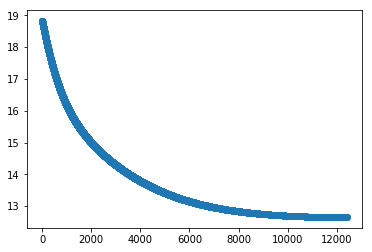

In [27]:
plt.scatter(itera , fc)

## The curve going to decrease as we increase iterations i.e it's a sign of that gradient decent works 